<a href="https://colab.research.google.com/github/MichelaPascale/AI_Python/blob/main/Challenge1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. Operazioni preliminari**

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
#Lettura csv

data = pd.read_csv("mushrooms.partial.csv")

In [45]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,k,s,e,f,s,f,c,n,b,t,?,s,k,p,w,p,w,o,e,w,v,d
1,p,x,s,n,f,f,f,c,n,b,t,?,k,s,w,w,p,w,o,e,w,v,p
2,p,f,y,e,f,y,f,c,n,b,t,?,s,s,p,w,p,w,o,e,w,v,l
3,e,f,f,n,t,n,f,c,b,u,t,b,s,s,g,p,p,w,o,p,n,v,d
4,e,b,y,y,t,l,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,p,x,y,n,f,f,f,c,n,b,t,?,k,s,p,w,p,w,o,e,w,v,p
6495,e,k,y,e,t,n,f,c,b,w,e,?,s,s,w,e,p,w,t,e,w,c,w
6496,e,f,y,n,t,l,f,c,b,w,e,r,s,y,w,w,p,w,o,p,n,y,p
6497,p,k,s,e,f,f,f,c,n,b,t,?,s,s,p,p,p,w,o,e,w,v,p


##**2. Manipolazione dati**

In [46]:
# Cambio i valori della colonna class in 0 e 1
data["class"] = [1 if i == "p" else 0 for i in data["class"]]

# Tolgo la colonna veil-type perché ha tutti i valori uguali a p => è una colonna superflua
data.drop("veil-type",axis=1,inplace=True)

In [47]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,k,s,e,f,s,f,c,n,b,t,?,s,k,p,w,w,o,e,w,v,d
1,1,x,s,n,f,f,f,c,n,b,t,?,k,s,w,w,w,o,e,w,v,p
2,1,f,y,e,f,y,f,c,n,b,t,?,s,s,p,w,w,o,e,w,v,l
3,0,f,f,n,t,n,f,c,b,u,t,b,s,s,g,p,w,o,p,n,v,d
4,0,b,y,y,t,l,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,1,x,y,n,f,f,f,c,n,b,t,?,k,s,p,w,w,o,e,w,v,p
6495,0,k,y,e,t,n,f,c,b,w,e,?,s,s,w,e,w,t,e,w,c,w
6496,0,f,y,n,t,l,f,c,b,w,e,r,s,y,w,w,w,o,p,n,y,p
6497,1,k,s,e,f,f,f,c,n,b,t,?,s,s,p,p,w,o,e,w,v,p


In [48]:
#Ora modifico i valori delle features, in modo tale da avere solo numeri interi o floats e non più lettere

#Per distinguere le varie lettere all'interno di una colonna faccio in questo modo:
#- Se ho 2 valori diversi per colonna => ad uno associo 1 e all'altro 0
#- Se ho 3 valori diversi per colonna => ad uno associo 1, all'altro 0 e all'altro ancora 0.5
#- Se ho 4 valori diversi per colonna => ad uno associo 1, all'altro 0, all'altro 0.33 e all'altro ancora 0.67
# => Per calcolare questi valori uso la seguente formula matematica: 1/(len(data[column].unique())-1)

for column in data.drop(["class"], axis=1).columns:
    value = 0  #valore di base
    step = 1/(len(data[column].unique())-1)
    for i in data[column].unique():
        data[column] = [value if letter == i else letter for letter in data[column]]
        value += step

In [49]:
#Ottengo quindi un dataframe con interi e floats al posto delle lettere
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.000,0.000,0.0,0.0,0.00,0.000,0.0,0.000000
1,1,0.2,0.000000,0.111111,0.0,0.125,0.0,0.0,0.0,0.000000,0.0,0.00,0.333333,0.333333,0.125,0.000,0.0,0.0,0.00,0.000,0.0,0.166667
2,1,0.4,0.333333,0.000000,0.0,0.250,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.333333,0.000,0.000,0.0,0.0,0.00,0.000,0.0,0.333333
3,0,0.4,0.666667,0.111111,1.0,0.375,0.0,0.0,1.0,0.090909,0.0,0.25,0.000000,0.333333,0.250,0.125,0.0,0.0,0.25,0.125,0.0,0.000000
4,0,0.6,0.333333,0.222222,1.0,0.500,0.0,0.0,1.0,0.181818,1.0,0.50,0.000000,0.333333,0.125,0.000,0.0,0.0,0.25,0.125,0.2,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,1,0.2,0.333333,0.111111,0.0,0.125,0.0,0.0,0.0,0.000000,0.0,0.00,0.333333,0.333333,0.000,0.000,0.0,0.0,0.00,0.000,0.0,0.166667
6495,0,0.0,0.333333,0.000000,1.0,0.375,0.0,0.0,1.0,0.272727,1.0,0.00,0.000000,0.333333,0.125,0.750,0.0,0.5,0.00,0.000,0.6,0.666667
6496,0,0.4,0.333333,0.111111,1.0,0.500,0.0,0.0,1.0,0.272727,1.0,1.00,0.000000,1.000000,0.125,0.000,0.0,0.0,0.25,0.125,0.4,0.166667
6497,1,0.0,0.000000,0.000000,0.0,0.125,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.333333,0.000,0.125,0.0,0.0,0.00,0.000,0.0,0.166667


##**3. Preparazione dati -> Suddivisione dei dati in training set e test set**

In [43]:
from sklearn.model_selection import train_test_split

In [50]:
y = data["class"].values    #prendo la colonna "class" e inserisco i valori in un array
print(y)

[1 1 1 ... 0 1 0]


In [51]:
x = data.drop(["class"], axis=1).values   # Inserisco in un array di array tutte le altre features tranne la colonna "class"
print(x)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.2        0.         0.11111111 ... 0.         0.         0.16666667]
 [0.4        0.33333333 0.         ... 0.         0.         0.33333333]
 ...
 [0.4        0.33333333 0.11111111 ... 0.125      0.4        0.16666667]
 [0.         0.         0.         ... 0.         0.         0.16666667]
 [0.         0.66666667 0.33333333 ... 0.         0.2        1.        ]]


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)    # Suddivisione dei dati in training e test set

##**4. Classificazione**

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
# creo il classificatore con K=3
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

ValueError: ignored

In [63]:
print("Test set predictions:", clf.predict(x_test))

Test set predictions: [0 0 0 ... 1 0 0]


In [64]:
print("Test set accuracy: {:.2f}".format(clf.score(x_test, y_test)))

Test set accuracy: 1.00


##**5. Analisi su grafico**

In [83]:
!sudo apt update && sudo apt install -y graphviz

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [60.9 kB]
Get:12 http://security.ubuntu.com/ubu

In [84]:
!pip install graphviz
!pip install mglearn
!pip install scikit-learn=='0.24.1'

In [88]:
import mglearn

ValueError: ignored

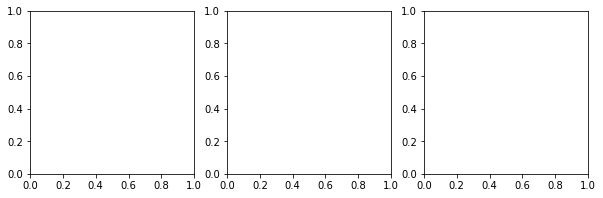

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x, y)
    mglearn.plots.plot_2d_separator(clf, x, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [91]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

ValueError: ignored